In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, explained_variance_score, accuracy_score

from skmixed.lme.models import Sr3L0LmeModel, L0LmeModel
from skmixed.lme.problems import LinearLMEProblem
from skmixed.lme.oracles import LinearLMEOracle

from skmixed.helpers import random_effects_to_matrix

from tqdm.notebook import tqdm

import pandas as pd

## Conditioning to missing data

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  "errors": np.array(errors_list),
/home/aksh/skmixed/skmixed/lme/problems.py:448: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating t

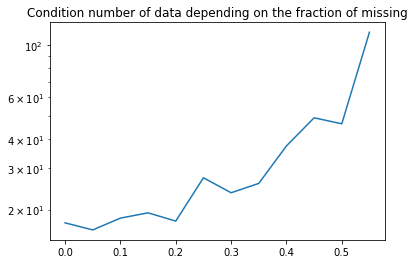

In [4]:
chances_missing = np.arange(0, 0.6, 0.05)
num_trials = 50

cond_numbers_missing = []


for j, chance_missing in enumerate(chances_missing):
    cond_current = []
    
    for i in range(num_trials):
        problem_parameters = {
            "groups_sizes": [20, 12, 14],
            "features_labels": [3, 3, 3, 3],
            "random_intercept": True,
            "obs_std": 0.1,
            "chance_missing": chance_missing,
            "chance_outlier": 0.0,
            "outlier_multiplier": 25
        }
        seed = i + int(1000*chance_missing)

        problem, true_model_parameters = LinearLMEProblem.generate(**problem_parameters,
                                                                   seed=seed)
        x, y = problem.to_x_y()
        
        oracle = LinearLMEOracle(problem)
        condition = oracle.get_condition_numbers()
        cond_current.append(condition)
        
    if len(cond_current) == 0:
        cond_numbers_missing.append(None)
    else:
        cond_numbers_missing.append(np.mean(cond_current))


plt.semilogy(chances_missing, cond_numbers_missing)
plt.title("Condition number of data depending on the fraction of missing")
plt.show()


## Conditioning to outliers

Text(0.5, 1.0, 'Condition number of data depending on the fraction of outliers')

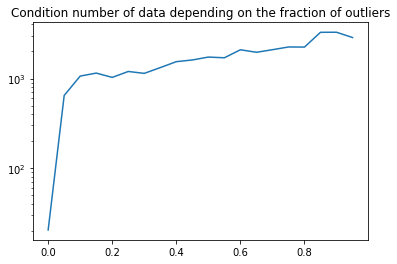

In [5]:
chances_missing = np.arange(0, 1, 0.05)
num_trials = 20

cond_numbers_missing = []
for chance_missing in chances_missing:
    cond_current = []
    for i in range(num_trials):
        problem_parameters = {
            "groups_sizes": [20, 12, 14],
            "features_labels": [3, 3, 3, 3],
            "random_intercept": True,
            "obs_std": 0.1,
            "chance_missing": 0.0,
            "chance_outlier": chance_missing,
            "outlier_multiplier": 25
        }
        seed = i + int(1000*chance_missing)
        problem, true_model_parameters = LinearLMEProblem.generate(**problem_parameters,
                                                                   #beta=true_beta,
                                                                   #gamma=true_gamma,
                                                                   seed=seed)
        oracle = LinearLMEOracle(problem)
        condition = oracle.get_condition_numbers()
        if condition[0] == np.infty:
            continue
        cond_current.append(condition[0])
    if len(cond_current) == 0:
        cond_numbers_missing.append(None)
    else:
        cond_numbers_missing.append(np.mean(cond_current))


plt.semilogy(chances_missing, cond_numbers_missing)
plt.title("Condition number of data depending on the fraction of outliers")

## Conditioning depending on correlation between features

Text(0.5, 1.0, 'Condition number of data depending on the correlation between features')

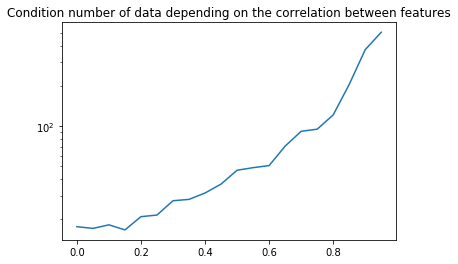

In [6]:
chances_missing = np.arange(0, 1, 0.05)
num_trials = 50

cond_numbers_missing = []
for chance_missing in chances_missing:
    cond_current = []
    for i in range(num_trials):
        problem_parameters = {
            "groups_sizes": [20, 12, 14],
            "features_labels": [3, 3, 3, 3],
            "random_intercept": True,
            "obs_std": 0.1,
            "chance_missing": 0.0,
            "chance_outlier": 0.0,
            "outlier_multiplier": 25,
            "features_covariance_matrix": np.array([
                [1, chance_missing, chance_missing, chance_missing],
                [chance_missing, 1, chance_missing, chance_missing],
                [chance_missing, chance_missing, 1, chance_missing],
                [chance_missing, chance_missing, chance_missing, 1]
            ]),
        }
        seed = i + int(1000*chance_missing)
        problem, true_model_parameters = LinearLMEProblem.generate(**problem_parameters,
                                                                   seed=seed)
        oracle = LinearLMEOracle(problem)
        condition = oracle.get_condition_numbers()
        if condition[0] == np.infty:
            continue
        cond_current.append(condition[0])
    if len(cond_current) == 0:
        cond_numbers_missing.append(None)
    else:
        cond_numbers_missing.append(np.mean(cond_current))


plt.semilogy(chances_missing, cond_numbers_missing)
plt.title("Condition number of data depending on the correlation between features")

## Conditioning depending on everything

Text(0.5, 1.0, 'Condition number of data depending on the correlation between features')

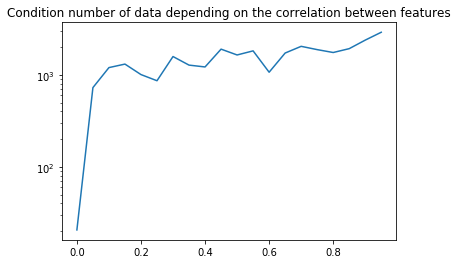

In [7]:
chances_missing = np.arange(0, 1, 0.05)
num_trials = 20

cond_numbers_missing = []
for chance_missing in chances_missing:
    cond_current = []
    for i in range(num_trials):
        problem_parameters = {
            "groups_sizes": [20, 12, 14],
            "features_labels": [3, 3, 3, 3],
            "random_intercept": True,
            "obs_std": 0.1,
            "chance_missing": chance_missing/2,
            "chance_outlier": chance_missing/2,
            "outlier_multiplier": 25,
            "features_covariance_matrix": np.array([
                [1, chance_missing, chance_missing, chance_missing],
                [chance_missing, 1, chance_missing, chance_missing],
                [chance_missing, chance_missing, 1, chance_missing],
                [chance_missing, chance_missing, chance_missing, 1]
            ]),
        }
        seed = i + int(1000*chance_missing)
        problem, true_model_parameters = LinearLMEProblem.generate(**problem_parameters,
                                                                   seed=seed)
        oracle = LinearLMEOracle(problem)
        condition = oracle.get_condition_numbers()
        if condition[0] == np.infty:
            continue
        cond_current.append(condition[0])
    if len(cond_current) == 0:
        cond_numbers_missing.append(None)
    else:
        cond_numbers_missing.append(np.mean(cond_current))


plt.semilogy(chances_missing, cond_numbers_missing)
plt.title("Condition number of data depending on the correlation between features")

## Analysis of the results

In [6]:
!ls

conditioning.py
experiments with conditioning.ipynb
l0_experiment.py
lasso_experiment.py
log_1.dump
log_2021-05-02 20:41:15.628843.csv
log_2021-05-02 20:42:12.490628.csv
log_2021-05-02 20:42:57.304585.csv
log_2021-05-02 20:43:21.989333.csv
log_2021-05-02 20:48:10.560031.csv
log_2021-05-02 20:50:12.938071.csv
log_2021-05-02 20:53:59.056849.csv
log_2021-05-02 21:04:22.423321.csv
log_2021-05-02 21:12:15.652441.csv
log_2021-05-02 21:27:28.758822.csv
log_2021-05-02 21:29:11.277591.csv
log_2021-05-02 21:29:20.593969.csv
log_correlation_2021-05-03 05:07:15.753655.csv
log_correlation_2021-05-04 21:59:58.363247.csv
log_correlation_2021-05-05 14:55:13.598083.csv
log_correlation_2021-05-05 18:58:25.599737.csv
log_correlation_2021-05-05 19:10:41.690272.csv
log_correlation_2021-05-05 19:15:18.872750.csv
log_correlation_2021-05-05 19:38:56.588154.csv
log_correlation_2021-05-05 22:19:52.598916.csv
log_correlation_2021-05-05 22:31:25.356642.csv
log_correlation_2021-05-05 22:33:58.634052.csv
log_correl

## Trial 1

In [10]:
log_correlation = pd.read_csv("log_correlation_2021-05-03 05:07:15.753655.csv")
log_missing = pd.read_csv("log_missing_2021-05-03 02:15:31.927820.csv")
log_outliers = pd.read_csv("log_outliers_2021-05-03 03:21:35.387887.csv")

datasets = {
    "Covariate correlation": log_correlation,
    "Missing values": log_missing, 
    "Outliers": log_outliers
}

## Trial 2

* lb, lg: 20 => 200
* oracle_iterations: 5 => 10

No clear improvement

In [11]:
log_correlation = pd.read_csv("log_correlation_2021-05-04 21:59:58.363247.csv")
log_missing = pd.read_csv("log_missing_2021-05-04 19:26:22.897623.csv")
log_outliers = pd.read_csv("log_outliers_2021-05-04 20:40:07.525613.csv")

datasets = {
    "Covariate correlation": log_correlation,
    "Missing values": log_missing, 
    "Outliers": log_outliers
}

## Trial 3
* Only log correlation but number of problems 20 => 200

The difference in sensitivity, specificity, and F1 is more clear, but the dynamics over the condition number is still flat

In [20]:
log_correlation = pd.read_csv("log_correlation_2021-05-05 14:55:13.598083.csv")

datasets = {
    "Covariate correlation": log_correlation,
}

## Trial 4
* Fixed the error. Try on one trial.
* Reduced regularization: 200 => 40
* Gave more iterations: 1000, 5 => 1e5, 1e5
* Removed higher values for missing outliers (it was not converging on time)

The correlation experiment showed perfect performance for both algorithms. Need a harder problem.

The performance of SR3 on missing values seems to be worse than to L0. Need more averaging to get the result.

In [59]:
log_correlation = pd.read_csv("log_correlation_2021-05-05 18:58:25.599737.csv")
log_missing = pd.read_csv("log_missing_2021-05-05 18:54:50.586132.csv")
log_outliers = pd.read_csv("log_outliers_2021-05-05 18:56:03.751580.csv")

datasets = {
    "Covariate correlation": log_correlation,
    "Missing values": log_missing, 
    "Outliers": log_outliers
}

## Trial 5
* correlations only. Implemented block-diagonal correlation matrix

Still too easy

In [62]:
log_correlation = pd.read_csv("log_correlation_2021-05-05 19:15:18.872750.csv")
datasets = {
    "Covariate correlation": log_correlation,
}

## Trial 6
* correlations only. Features 20 => 40, noise 0.1 => 0.3
* iterations 1e5 => 1e4 (was too slow)

The solution looks beautiful! SR3 maintains perfect performance whereas L0 drops linearly. 

In [95]:
log_correlation = pd.read_csv("log_correlation_2021-05-05 19:38:56.588154.csv")
datasets = {
    "Covariate correlation": log_correlation,
}

## Trial 7
Add experiment with noise.

It looks like prox-gd just does not iterate more than once :/

In [98]:
log_noise = pd.read_csv("log_noise_2021-05-05 22:09:41.076935.csv")
log_correlation = pd.read_csv("log_correlation_2021-05-05 19:38:56.588154.csv")
datasets = {
    "Noise": log_noise,
    "Covariate correlation": log_correlation,
}

## Trial 8

Change the step-len to max/2.

In [111]:
log_correlation = pd.read_csv("log_correlation_2021-05-05 22:19:52.598916.csv")
datasets = {
    "Covariate correlation": log_correlation,
}

## Trial 9

Fixed a bug in direction.

Still looks good. The noise range should be extended.

In [10]:
log_noise = pd.read_csv("log_noise_2021-05-05 22:49:56.121903.csv")
log_correlation = pd.read_csv("log_correlation_2021-05-05 22:47:54.524227.csv")
datasets = {
    "Noise": log_noise,
    "Covariate correlation": log_correlation,
}

## Trial 10

* Extend the range for noise: 0 - 0.5 => 0 - 4

In [13]:
log_noise = pd.read_csv("log_noise_2021-05-06 01:09:59.711339.csv")
log_correlation = pd.read_csv("log_correlation_2021-05-05 22:47:54.524227.csv")
datasets = {
    "Noise": log_noise,
    "Covariate correlation": log_correlation,
}

# num_trials = 5
# num_covariates = 40

# model_parameters = {
#     "lb": 40,
#     "lg": 40,
#     "initializer": "None",
#     "logger_keys": ('converged', 'loss',),
#     "tol_oracle": 1e-3,
#     "tol_solver": 1e-5,
#     "max_iter_oracle": 10000,
#     "max_iter_solver": 10000,
#     "warm_start": True,
# }

# problem_parameters = {
#     "groups_sizes": [20, 12, 14, 50, 11]*2,
#     "features_labels": [3]*num_covariates,
#     "random_intercept": True,
#     "obs_std": 0.3,
#     "chance_missing": 0,
#     "chance_outlier": 0.0,
#     "outlier_multiplier": 10
# }

## Trial 11 

1) Noise results were measured on different problems each time. Fix random seed so the only difference is the multiplier for the noise. All other problem components, including randomly generated (even including the normalized noise) stay the same.

2) Covariates correlation were also measured on different data for every point. Fixed random seed. It seems like the only difference will be the covariate matrix in a sense of a multiplicative factor

**outcome** 
1) The noise seems to be an issue for both algorithms in equal fraction. Need to check why it worked out in SR3

2) Correlations give a good picture. Need to think how to make more massive experiment.

In [36]:
log_noise = pd.read_csv("log_noise_2021-05-17 18:26:45.640752.csv")
log_correlation = pd.read_csv("log_correlation_2021-05-17 17:10:59.549334.csv")
datasets = {
#    "Noise": log_noise,
    "Covariate correlation": log_correlation,
}

1) Relative time
2) Relative number of iterations 
3) Relative explained variance
4) Relative sensitivity fe 
5) Relative specificity fe
6) Relative f1-measure fe
7) Relative sensitivity re 
8) Relative specificity re
9) Relative f1-measure re


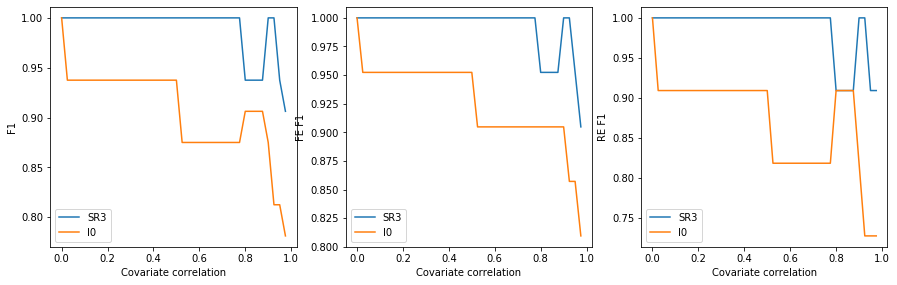

In [37]:

for name, data in datasets.items():
    
    data["tp"] = data["fe_tp"] + data["re_tp"]
    data["tn"] = data["fe_tn"] + data["re_tn"]
    data["fp"] = data["fe_fp"] + data["re_fp"]
    data["fn"] = data["fe_fn"] + data["re_fn"]

    data["fe_sensitivity"] = data["fe_tp"] / (data["fe_tp"] + data["fe_fn"])
    data["fe_specificity"] = data["fe_tn"] / (data["fe_tn"] + data["fe_fp"])
    data["fe_f1"] = 2*data["fe_tp"]/(2*data["fe_tp"] + data["fe_fp"] + data["fe_fn"])

    data["re_sensitivity"] = data["re_tp"] / (data["re_tp"] + data["re_fn"])
    data["re_specificity"] = data["re_tn"] / (data["re_tn"] + data["re_fp"])
    data["re_f1"] = 2*data["re_tp"]/(2*data["re_tp"] + data["re_fp"] + data["re_fn"])
    
    data["sensitivity"] = data["tp"] / (data["tp"] + data["fn"])
    data["specificity"] = data["tn"] / (data["tn"] + data["fp"])
    data["f1"] = 2*data["tp"]/(2*data["tp"] + data["fp"] + data["fn"])

    columns_average = [ "sensitivity", "specificity", "f1",
                        "fe_sensitivity", "fe_specificity", "fe_f1",
                       "re_sensitivity", "re_specificity", "re_f1"]

    columns_rel_average = ["time", "mse", "evar", "number_of_iterations"]


    l0_data = data[data["model"]=="L0"]
    sr3_data = data[data["model"]=="SR3_L0"]
    l0_data_mean = l0_data[["chance"] + columns_average].groupby("chance").agg('mean')
    sr3_data_mean = sr3_data[["chance"] + columns_average].groupby("chance").agg('mean')
    rel_data = l0_data.copy()[["chance"] + columns_rel_average]
    rel_data[columns_rel_average] = rel_data[columns_rel_average].to_numpy() / sr3_data[columns_rel_average].to_numpy()
    rel_data = rel_data.groupby("chance").agg('mean')
    agg_data = rel_data.merge(sr3_data_mean, on="chance", suffixes=("", "_sr3"))
    agg_data = agg_data.merge(l0_data_mean, on="chance", suffixes=("", "_l0"))

    
    base_size = 5
    fig = plt.figure(figsize=(3*base_size, 3*base_size))
    grid = plt.GridSpec(nrows=3, ncols=3)

#     ax_fe_sensetivity = fig.add_subplot(grid[0, 0])
#     ax_fe_sensetivity.plot(agg_data["sensitivity"], label="SR3")
#     ax_fe_sensetivity.plot(agg_data["sensitivity_l0"], label="l0")
#     ax_fe_sensetivity.set_xlabel(name)
#     ax_fe_sensetivity.set_ylabel("sensitivity")
#     ax_fe_sensetivity.legend()

#     ax_fe_specificity = fig.add_subplot(grid[0, 1])
#     ax_fe_specificity.plot(agg_data["specificity"], label="SR3")
#     ax_fe_specificity.plot(agg_data["specificity_l0"], label="l0")
#     ax_fe_specificity.set_xlabel(name)
#     ax_fe_specificity.set_ylabel("specificity")
#     ax_fe_specificity.legend()

    ax_fe_f1 = fig.add_subplot(grid[0, 0])
    ax_fe_f1.plot(agg_data["f1"], label="SR3")
    ax_fe_f1.plot(agg_data["f1_l0"], label="l0")
    ax_fe_f1.set_xlabel(name)
    ax_fe_f1.set_ylabel("F1")
    ax_fe_f1.legend()

#     ax_fe_sensetivity = fig.add_subplot(grid[1, 0])
#     ax_fe_sensetivity.plot(agg_data["fe_sensitivity"], label="SR3")
#     ax_fe_sensetivity.plot(agg_data["fe_sensitivity_l0"], label="l0")
#     ax_fe_sensetivity.set_xlabel(name)
#     ax_fe_sensetivity.set_ylabel("FE sensitivity")
#     ax_fe_sensetivity.legend()

#     ax_fe_specificity = fig.add_subplot(grid[1, 1])
#     ax_fe_specificity.plot(agg_data["fe_specificity"], label="SR3")
#     ax_fe_specificity.plot(agg_data["fe_specificity_l0"], label="l0")
#     ax_fe_specificity.set_xlabel(name)
#     ax_fe_specificity.set_ylabel("FE specificity")
#     ax_fe_specificity.legend()

    ax_fe_f1 = fig.add_subplot(grid[0, 1])
    ax_fe_f1.plot(agg_data["fe_f1"], label="SR3")
    ax_fe_f1.plot(agg_data["fe_f1_l0"], label="l0")
    ax_fe_f1.set_xlabel(name)
    ax_fe_f1.set_ylabel("FE F1")
    ax_fe_f1.legend()

#     ax_re_sensetivity = fig.add_subplot(grid[2, 0])
#     ax_re_sensetivity.plot(agg_data["re_sensitivity"], label="SR3")
#     ax_re_sensetivity.plot(agg_data["re_sensitivity_l0"], label="l0")
#     ax_re_sensetivity.set_xlabel(name)
#     ax_re_sensetivity.set_ylabel("RE sensitivity")
#     ax_re_sensetivity.legend()

#     ax_re_specificity = fig.add_subplot(grid[2, 1])
#     ax_re_specificity.plot(agg_data["re_specificity"], label="SR3")
#     ax_re_specificity.plot(agg_data["re_specificity_l0"], label="l0")
#     ax_re_specificity.set_xlabel(name)
#     ax_re_specificity.set_ylabel("RE specificity")
#     ax_re_specificity.legend()

    ax_re_f1 = fig.add_subplot(grid[0, 2])
    ax_re_f1.plot(agg_data["re_f1"], label="SR3")
    ax_re_f1.plot(agg_data["re_f1_l0"], label="l0")
    ax_re_f1.set_xlabel(name)
    ax_re_f1.set_ylabel("RE F1")
    ax_re_f1.legend()
    
#     ax_time = fig.add_subplot(grid[1, 0])
#     ax_time.plot(1/agg_data["time"])
#     ax_time.set_ylabel("Time")
    
#     ax_mse = fig.add_subplot(grid[1, 1])
#     ax_mse.plot(agg_data["number_of_iterations"])
#     ax_mse.set_ylabel("Number of iterations")
    
#     ax_evar = fig.add_subplot(grid[1, 2])
#     ax_evar.plot(1/agg_data["evar"])
#     ax_evar.set_ylabel("explained variance")



    plt.show()

## Trial 12

Generate 10 more example trajectories for noise experiment 

In [50]:
log_correlation = pd.read_csv("log_correlation_2021-05-18 14:05:08.555581.csv")
datasets = {
#    "Noise": log_noise,
    "Covariate correlation": log_correlation,
}

#     num_trials = 10
#     num_covariates = 40

#     model_parameters = {
#         "lb": 40,
#         "lg": 40,
#         "initializer": "None",
#         "logger_keys": ('converged', 'loss',),
#         "tol_oracle": 1e-3,
#         "tol_solver": 1e-5,
#         "max_iter_oracle": 10000,
#         "max_iter_solver": 10000,
#         "warm_start": True,
#     }

#     problem_parameters = {
#         "groups_sizes": [20, 12, 14, 50, 11]*2,
#         "features_labels": [3]*num_covariates,
#         "random_intercept": True,
#         "obs_std": 0.3,
#         "chance_missing": 0,
#         "chance_outlier": 0.0,
#         "outlier_multiplier": 10
#     }


## Trial 13
Doppio struggles finishing the previous one. 

* Decrease obs std 0.3 => 0.1 to keep solutions consistent with L1

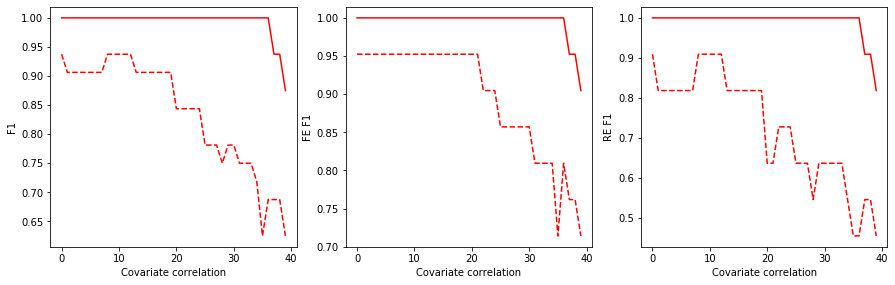

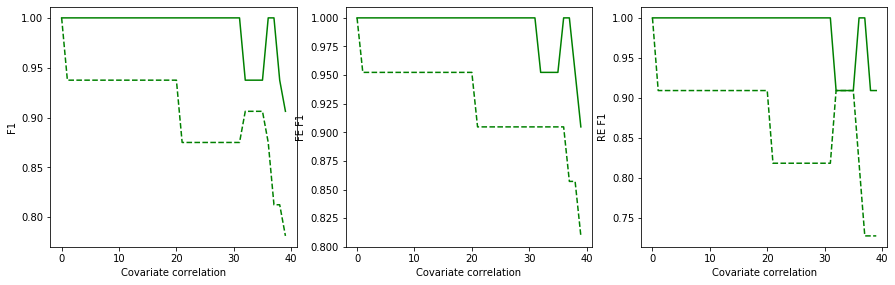

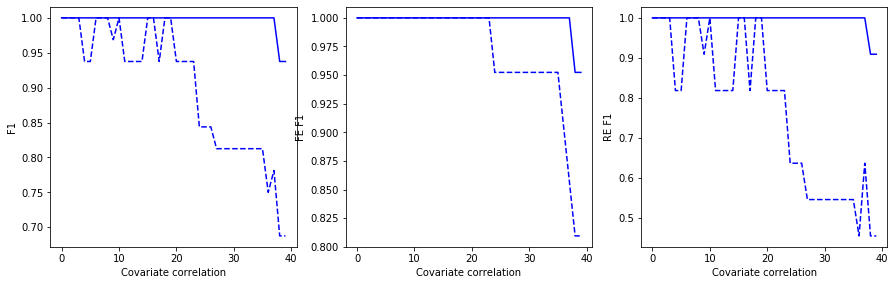

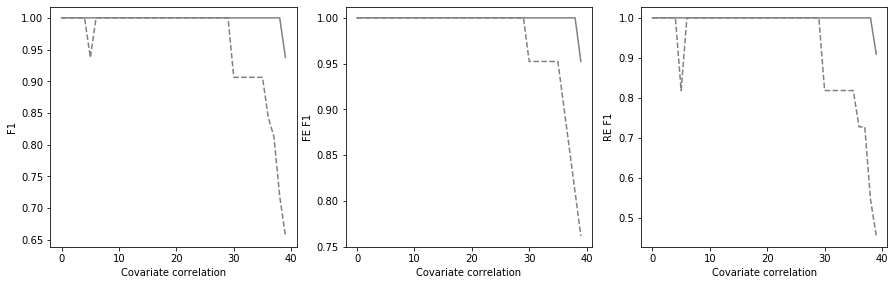

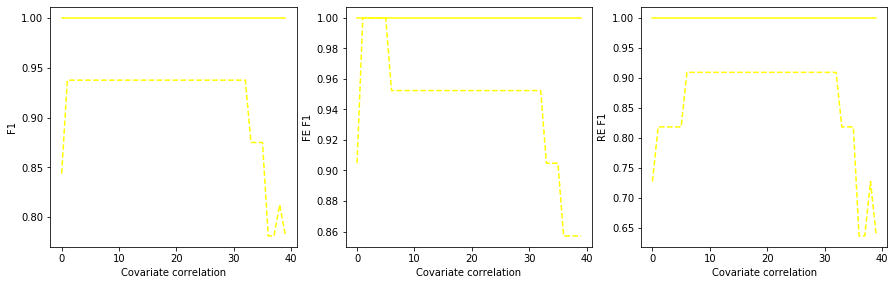

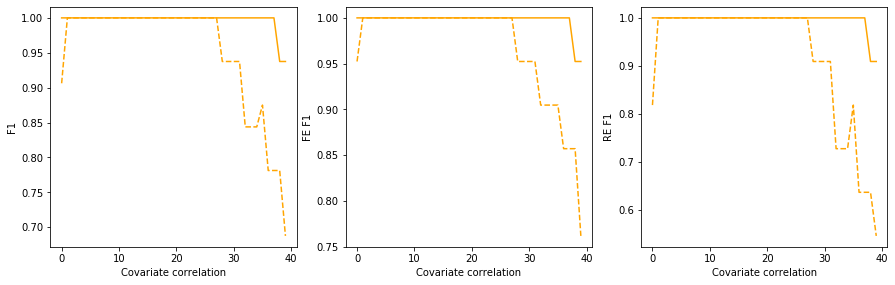

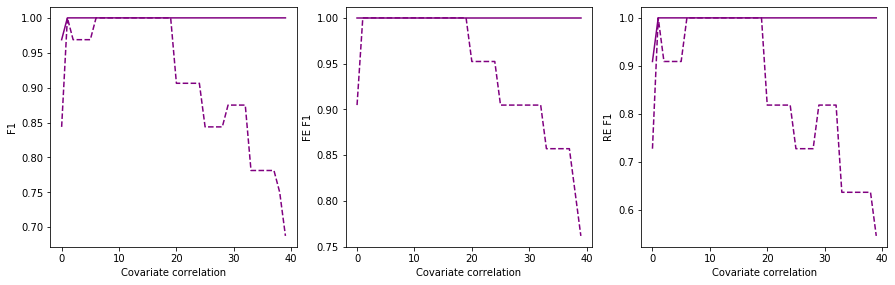

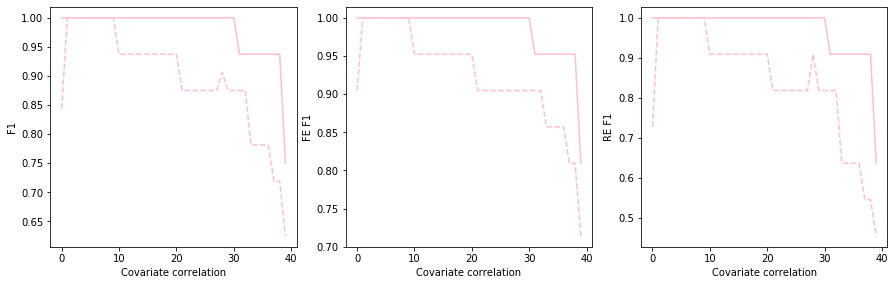

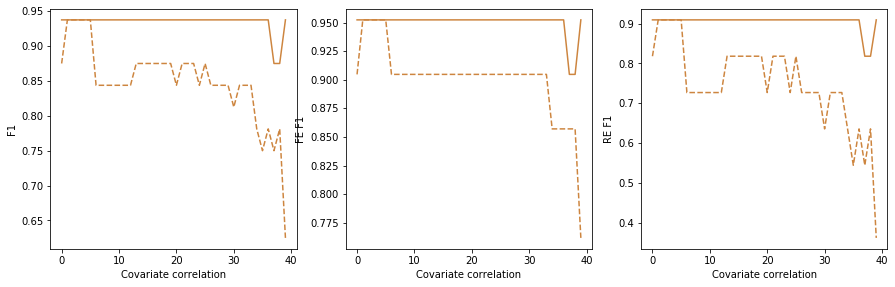

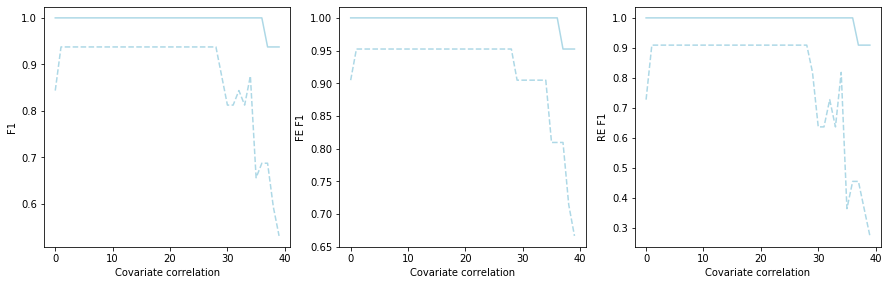

In [49]:

for name, data in datasets.items():
    
    data["tp"] = data["fe_tp"] + data["re_tp"]
    data["tn"] = data["fe_tn"] + data["re_tn"]
    data["fp"] = data["fe_fp"] + data["re_fp"]
    data["fn"] = data["fe_fn"] + data["re_fn"]

    data["fe_sensitivity"] = data["fe_tp"] / (data["fe_tp"] + data["fe_fn"])
    data["fe_specificity"] = data["fe_tn"] / (data["fe_tn"] + data["fe_fp"])
    data["fe_f1"] = 2*data["fe_tp"]/(2*data["fe_tp"] + data["fe_fp"] + data["fe_fn"])

    data["re_sensitivity"] = data["re_tp"] / (data["re_tp"] + data["re_fn"])
    data["re_specificity"] = data["re_tn"] / (data["re_tn"] + data["re_fp"])
    data["re_f1"] = 2*data["re_tp"]/(2*data["re_tp"] + data["re_fp"] + data["re_fn"])
    
    data["sensitivity"] = data["tp"] / (data["tp"] + data["fn"])
    data["specificity"] = data["tn"] / (data["tn"] + data["fp"])
    data["f1"] = 2*data["tp"]/(2*data["tp"] + data["fp"] + data["fn"])

    columns_average = [ "sensitivity", "specificity", "f1",
                        "fe_sensitivity", "fe_specificity", "fe_f1",
                       "re_sensitivity", "re_specificity", "re_f1"]

    columns_rel_average = ["time", "mse", "evar", "number_of_iterations"]


    
    #l0_data_mean = l0_data[["chance"] + columns_average].groupby("chance").agg('mean')
    #sr3_data_mean = sr3_data[["chance"] + columns_average].groupby("chance").agg('mean')
    #rel_data = l0_data.copy()[["chance"] + columns_rel_average]
    #rel_data[columns_rel_average] = rel_data[columns_rel_average].to_numpy() / sr3_data[columns_rel_average].to_numpy()
    #rel_data = rel_data.groupby("chance").agg('mean')
    
    colors = ["red", "green", "blue", "gray", "yellow", "orange", "purple", "pink", "peru", "lightblue", "navy"]
    for i in data["i"].unique():
        current_data = data[data["i"] == i]
        l0_data = current_data[current_data["model"]=="L0"]
        sr3_data = current_data[current_data["model"]=="SR3_L0"]
        agg_data = l0_data.merge(sr3_data, on="chance", suffixes=("_l0", "_sr3"))
        #agg_data = agg_data.merge(sr3_data, on="chance", suffixes=("", "_l0"))
        
        base_size = 5
        fig = plt.figure(figsize=(3*base_size, 3*base_size))
        grid = plt.GridSpec(nrows=3, ncols=3)
        ax_f1 = fig.add_subplot(grid[0, 0])
        ax_fe_f1 = fig.add_subplot(grid[0, 1])
        ax_re_f1 = fig.add_subplot(grid[0, 2])


        ax_f1.plot(agg_data["f1_sr3"], label="SR3", c=colors[i])
        ax_f1.plot(agg_data["f1_l0"], label="l0", c=colors[i], linestyle='dashed')
        ax_f1.set_xlabel(name)
        ax_f1.set_ylabel("F1")
        #ax_fe_f1.legend()

        ax_fe_f1.plot(agg_data["fe_f1_sr3"], label="SR3", c=colors[i])
        ax_fe_f1.plot(agg_data["fe_f1_l0"], label="l0", c=colors[i], linestyle='dashed')
        ax_fe_f1.set_xlabel(name)
        ax_fe_f1.set_ylabel("FE F1")
        #ax_fe_f1.legend()

        ax_re_f1.plot(agg_data["re_f1_sr3"], label="SR3", c=colors[i])
        ax_re_f1.plot(agg_data["re_f1_l0"], label="l0", c=colors[i], linestyle='dashed')
        ax_re_f1.set_xlabel(name)
        ax_re_f1.set_ylabel("RE F1")
        #ax_re_f1.legend()
    

    plt.show()

## Lasso experiment

### Trial 2
* Doubled the size of the problem

First generated full ROC AUC, looks good

In [15]:
log_lasso = pd.read_csv("log_lasso_2021-05-04 22:52:54.140100.csv")

### Trial 3
* covariance between features 0 => 0.8

ROC AUC has been improved even more

In [ ]:
log_lasso = pd.read_csv("log_lasso_2021-05-04 23:07:43.313137.csv")

## Trial 4
Found a bug in previous trial, disregard.
Regenerate LASSO experiment with same parameters after fixing the bug.
The ROC AUC plot looks really weird. I guess the maximum number of iterations was insufficient

In [25]:
log_lasso = pd.read_csv("log_lasso_2021-05-05 16:21:04.361191.csv")

## Trial 5
Same but max number of iterations: 1000 => 100000

Also, more fine steppling for lambda: lam = 1.1 * (lam + 0.1) => lam = 1.05 * (lam + 0.1)

In [28]:
log_lasso = pd.read_csv("log_lasso_2021-05-05 16:38:36.355206.csv")

## Trial 6
Replaced means in definitions of fp/tp to sums (bug fixing). Relaunched with the same parameters. Should not change the numbers.

So it looks good. SR3 L1 is ultimately better in finding the right random effects

In [ ]:
num_trials = 1

# model_parameters = {
#     "lb": 40,
#     "lg": 40,
#     "initializer": "None",
#     "logger_keys": ('converged', 'loss',),
#     "tol_oracle": 1e-3,
#     "tol_solver": 1e-6,
#     "max_iter_oracle": 100000,
#     "max_iter_solver": 100000
# }

# cov = 0.0
# problem_parameters = {
#     "groups_sizes": [20, 12, 14, 50, 11]*2,
#     "features_labels": [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]*2,
#     "random_intercept": True,
#     "obs_std": 0.1,
#     "chance_missing": 0,
#     "chance_outlier": 0.0,
#     "outlier_multiplier": 5,
#     "features_covariance_matrix": np.eye(20) + cov - np.eye(20)*cov
# }

In [89]:
log_lasso = pd.read_csv("log_lasso_2021-05-05 17:12:56.278109.csv")

## Trial 7
* Increase noise levels and the size of the problem in a hope of better performance contrast: sigma 0.1 => 0.3
* Number of iterations 1e5 => 1e4
* Did not seem to make it better actually :/ 

In [85]:
log_lasso = pd.read_csv("log_lasso_2021-05-05 20:37:41.167947.csv")

## Trial 8
* Add the same covariance matrix structure as in trial 5

It actually improved the identification of FE by L1 O_o

In [82]:
log_lasso = pd.read_csv("log_lasso_2021-05-05 21:37:04.501714.csv")

## Trial 9

* Fixed bug in direction. Relaunch with the parameters of trial 6: cov_matrix = I, sigma = 0.1

Looks good but L1 plots are very rough. I guess it's because it starts from scratch every time.

In [15]:
log_lasso = pd.read_csv("log_lasso_2021-05-05 22:58:21.341969.csv")

## Trial 10

First doppio trial. 

* Increase noise: obs_std 0.1 => 0.3 for better consistency
* Made beta and gamma of the same structure: 0101... (does not play role anyway)

**result** 
The correct peak is considerably more narrow for SR3, but the overall dynamic is the same.

In [6]:
log_lasso = pd.read_csv("log_lasso_2021-05-19 16:01:08.249818.csv")

## Trial 11
* Decrease noise: obs_std 0.3 => 0.1 in hopes of showing wider peak

**result** worked!

In [24]:
log_lasso = pd.read_csv("log_lasso_2021-05-19 17:12:55.353905.csv")

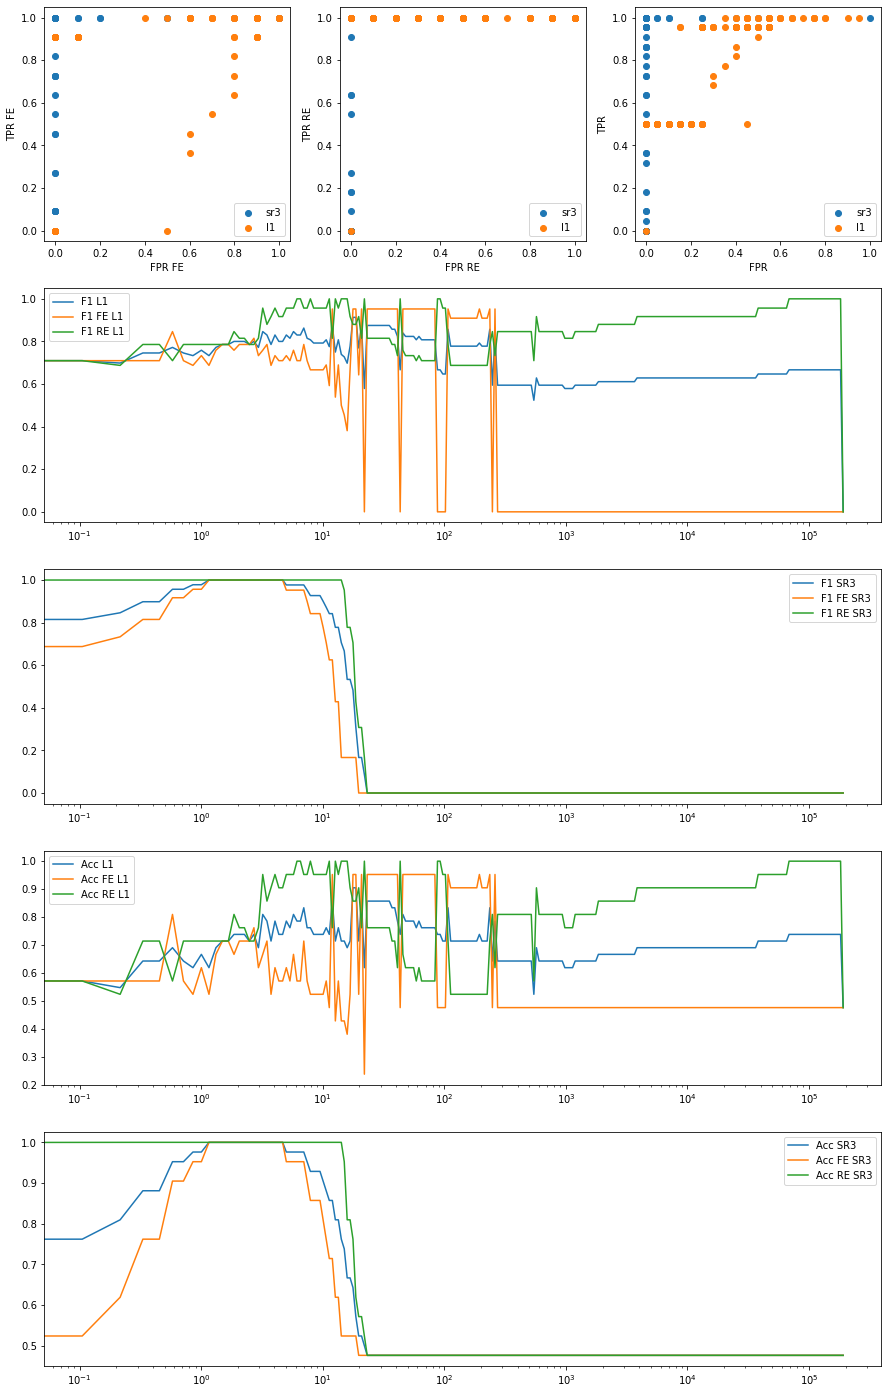

In [25]:
datasets = {
    "lasso": log_lasso
}

for name, data in datasets.items():
    
    data["tp"] = data["fe_tp"] + data["re_tp"]
    data["tn"] = data["fe_tn"] + data["re_tn"]
    data["fp"] = data["fe_fp"] + data["re_fp"]
    data["fn"] = data["fe_fn"] + data["re_fn"]
    
    data["fe_sensitivity"] = data["fe_tp"] / (data["fe_tp"] + data["fe_fn"])
    data["fe_specificity"] = data["fe_tn"] / (data["fe_tn"] + data["fe_fp"])
    data["fe_fpr"] = data["fe_fp"] / (data["fe_fp"] + data["fe_tn"])
    data["fe_f1"] = 2*data["fe_tp"]/(2*data["fe_tp"] + data["fe_fp"] + data["fe_fn"])
    data["fe_acc"] = (data["fe_tp"] + data["fe_tn"])/(data["fe_tp"] + data["fe_fn"] + data["fe_tn"] + data["fe_fp"])

    data["re_sensitivity"] = data["re_tp"] / (data["re_tp"] + data["re_fn"])
    data["re_specificity"] = data["re_tn"] / (data["re_tn"] + data["re_fp"])
    data["re_fpr"] = data["re_fp"] / (data["re_fp"] + data["re_tn"])
    data["re_f1"] = 2*data["re_tp"]/(2*data["re_tp"] + data["re_fp"] + data["re_fn"])
    data["re_acc"] = (data["re_tp"] + data["re_tn"])/(data["re_tp"] + data["re_fn"] + data["re_tn"] + data["re_fp"])
   
    data["sensitivity"] = data["tp"] / (data["tp"] + data["fn"])
    data["fpr"] = data["fp"] / (data["fp"] + data["tn"])
    data["f1"] = 2*data["tp"]/(2*data["tp"] + data["fp"] + data["fn"])
    data["acc"] = (data["tp"] + data["tn"])/(data["tp"] + data["fn"] + data["tn"] + data["fp"])
    

    l1_data = data[data["model"]=="L1"]
    sr3_data = data[data["model"]=="SR3_L1"]
    
    agg_data = sr3_data.copy()
    agg_data = agg_data.merge(l1_data, on="lam", suffixes=("_sr3", "_l1"))

    base_size = 5
    fig = plt.figure(figsize=(3*base_size, 5*base_size))
    grid = plt.GridSpec(nrows=5, ncols=3)

    fe_plot = fig.add_subplot(grid[0, 0])
    fe_plot.scatter(agg_data["fe_fpr_sr3"], agg_data["fe_sensitivity_sr3"], label="sr3")
    fe_plot.scatter(agg_data["fe_fpr_l1"], agg_data["fe_sensitivity_l1"], label="l1")
    fe_plot.set_xlabel("FPR FE")
    fe_plot.set_ylabel("TPR FE")
    fe_plot.legend()
    
    re_plot = fig.add_subplot(grid[0, 1])
    re_plot.scatter(agg_data["re_fpr_sr3"], agg_data["re_sensitivity_sr3"], label="sr3")
    re_plot.scatter(agg_data["re_fpr_l1"], agg_data["re_sensitivity_l1"], label="l1")
    re_plot.set_xlabel("FPR RE")
    re_plot.set_ylabel("TPR RE")
    re_plot.legend()
    
        
    all_plot = fig.add_subplot(grid[0, 2])
    all_plot.scatter(agg_data["fpr_sr3"], agg_data["sensitivity_sr3"], label="sr3")
    all_plot.scatter(agg_data["fpr_l1"], agg_data["sensitivity_l1"], label="l1")
    all_plot.set_xlabel("FPR")
    all_plot.set_ylabel("TPR")
    all_plot.legend()
    
    lambda_l1_plot = fig.add_subplot(grid[1, :])
    lambda_l1_plot.semilogx(agg_data["lam"], agg_data["f1_l1"], label="F1 L1")
    lambda_l1_plot.semilogx(agg_data["lam"], agg_data["fe_f1_l1"], label="F1 FE L1")
    lambda_l1_plot.semilogx(agg_data["lam"], agg_data["re_f1_l1"], label="F1 RE L1")
    lambda_l1_plot.legend()
    
    lambda_sr3_plot = fig.add_subplot(grid[2, :])
    lambda_sr3_plot.semilogx(agg_data["lam"], agg_data["f1_sr3"], label="F1 SR3")
    lambda_sr3_plot.semilogx(agg_data["lam"], agg_data["fe_f1_sr3"], label="F1 FE SR3")
    lambda_sr3_plot.semilogx(agg_data["lam"], agg_data["re_f1_sr3"], label="F1 RE SR3")
    lambda_sr3_plot.legend()
    
    lambda_l1_plot = fig.add_subplot(grid[3, :])
    lambda_l1_plot.semilogx(agg_data["lam"], agg_data["acc_l1"], label="Acc L1")
    lambda_l1_plot.semilogx(agg_data["lam"], agg_data["fe_acc_l1"], label="Acc FE L1")
    lambda_l1_plot.semilogx(agg_data["lam"], agg_data["re_acc_l1"], label="Acc RE L1")
    lambda_l1_plot.legend()
    
    lambda_sr3_plot = fig.add_subplot(grid[4, :])
    lambda_sr3_plot.semilogx(agg_data["lam"], agg_data["acc_sr3"], label="Acc SR3")
    lambda_sr3_plot.semilogx(agg_data["lam"], agg_data["fe_acc_sr3"], label="Acc FE SR3")
    lambda_sr3_plot.semilogx(agg_data["lam"], agg_data["re_acc_sr3"], label="Acc RE SR3")
    lambda_sr3_plot.legend()
    
    
    plt.show()

## L0 experiment

## Trial 0

Identical to Trial 10 of LASSO experiment.

Both methods seem to be performing on-par, with L0 being a bit better than SR3. The features are uncorrelated in this experiment.

In [24]:
log_l0 = pd.read_csv("log_l0_2021-05-11 10:01:53.534346.csv")

## Trial 1
Increase the correlation between adjacent features from 0 to 0.9.

Still close performance. 

In [11]:
log_l0 = pd.read_csv("log_l0_2021-05-11 15:26:54.128574.csv")

## Trial 2
I bring the configuration of the experiment closer to that of L0:

* num_features 20 => 40
* obs_std 0.1 => 0.3

Also, to accelerate it we set
* max_iter_oracle: 1e4 => 1

Still no considerable difference

In [15]:
log_l0 = pd.read_csv("log_l0_2021-05-11 16:25:11.111229.csv")

## Trial 3

Try dropping regularization to see if it's better

* lb: 40 => 1
* lg: 40 => 1

The results are better. We see that the SR3 goes to the right solution ASAP, whereas L0 does it later

In [18]:
log_l0 = pd.read_csv("log_l0_2021-05-11 16:59:12.151419.csv")

## Trial 4

Now the goal is to improve the performance on RE ROC Curve

* n_iter_oracle: 1 => 10

Did not work

In [20]:
log_l0 = pd.read_csv("log_l0_2021-05-11 17:26:18.017676.csv")

## Trial 4

Now the goal is to improve the performance on RE ROC Curve

* lg: 1 => 10

Worked! The initial curve of REs looks a bit better.

However, it seems only because the solutions are more dense for SR3

In [26]:
log_l0 = pd.read_csv("log_l0_2021-05-11 17:43:16.932120.csv")

## Trial 5

Now the goal is to improve the performance on RE ROC Curve

* lg: 10 => 20

Did not change anything.

In [51]:
log_l0 = pd.read_csv("log_l0_2021-05-11 18:17:46.240229.csv")


#     num_covariates = 40

#     model_parameters = {
#         "lb": 1,
#         "lg": 20,
#         "initializer": "None",
#         "logger_keys": ('converged', 'loss',),
#         "tol_oracle": 1e-3,
#         "tol_solver": 1e-6,
#         "max_iter_oracle": 10,
#         "max_iter_solver": 10000,
#     }

#     cov = 0.9
#     problem_parameters = {
#         "groups_sizes": [20, 12, 14, 50, 11] * 2,
#         "features_labels": [3] * num_covariates,
#         "random_intercept": True,
#         "obs_std": 0.3,
#         "chance_missing": 0,
#         "chance_outlier": 0.0,
#         "outlier_multiplier": 5,
#         # "features_covariance_matrix": np.eye(num_covariates)
#         "features_covariance_matrix": sp.linalg.block_diag(
#             *([np.array([[1, cov], [cov, 1]])] * int(num_covariates / 2)))
#     }


## Trial 6 (Doppio Trial)

Redo all the experiments with the following uniform settings:

* lb = lg = 40

* obs_std = 0.1

* num_covariates = 20

**result** both algorithms perform perfectly, so the problem is way too easy

In [16]:
log_l0 = pd.read_csv("log_l0_2021-05-19 17:37:34.127505.csv")

## Trial 7

* obs_std: 0.1 => 0.3

**result**: Still too easy!


In [22]:
log_l0 = pd.read_csv("log_l0_2021-05-20 11:17:42.681374.csv")

## Trial 8

* obs_std 0.3 => 0.1
* num_covariates: 20 => 40

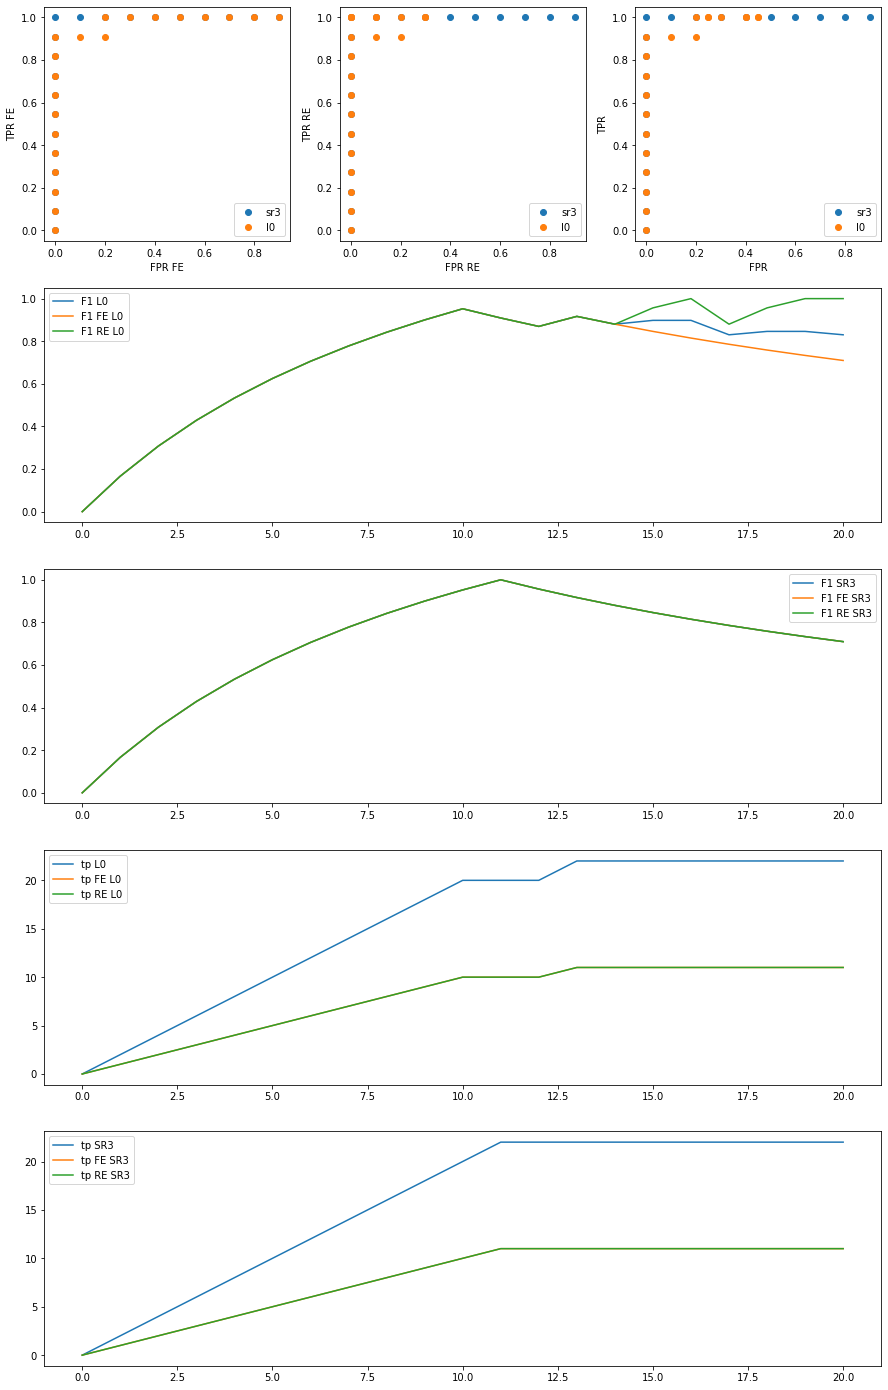

In [23]:
datasets = {
    "lasso": log_l0
}

for name, data in datasets.items():
    
    data["nnz"] = data["nnz"].astype(int)
    
    data["tp"] = data["fe_tp"] + data["re_tp"]
    data["tn"] = data["fe_tn"] + data["re_tn"]
    data["fp"] = data["fe_fp"] + data["re_fp"]
    data["fn"] = data["fe_fn"] + data["re_fn"]
    
    data["fe_sensitivity"] = data["fe_tp"] / (data["fe_tp"] + data["fe_fn"])
    data["fe_specificity"] = data["fe_tn"] / (data["fe_tn"] + data["fe_fp"])
    data["fe_fpr"] = data["fe_fp"] / (data["fe_fp"] + data["fe_tn"])
    data["fe_f1"] = 2*data["fe_tp"]/(2*data["fe_tp"] + data["fe_fp"] + data["fe_fn"])
    data["fe_acc"] = (data["fe_tp"] + data["fe_tn"])/(data["fe_tp"] + data["fe_fn"] + data["fe_tn"] + data["fe_fp"])

    data["re_sensitivity"] = data["re_tp"] / (data["re_tp"] + data["re_fn"])
    data["re_specificity"] = data["re_tn"] / (data["re_tn"] + data["re_fp"])
    data["re_fpr"] = data["re_fp"] / (data["re_fp"] + data["re_tn"])
    data["re_f1"] = 2*data["re_tp"]/(2*data["re_tp"] + data["re_fp"] + data["re_fn"])
    data["re_acc"] = (data["re_tp"] + data["re_tn"])/(data["re_tp"] + data["re_fn"] + data["re_tn"] + data["re_fp"])
   
    data["sensitivity"] = data["tp"] / (data["tp"] + data["fn"])
    data["fpr"] = data["fp"] / (data["fp"] + data["tn"])
    data["f1"] = 2*data["tp"]/(2*data["tp"] + data["fp"] + data["fn"])
    data["acc"] = (data["tp"] + data["tn"])/(data["tp"] + data["fn"] + data["tn"] + data["fp"])
    

    l1_data = data[data["model"]=="L0"]
    sr3_data = data[data["model"]=="SR3_L0"]
    
    agg_data = sr3_data.copy()
    agg_data = agg_data.merge(l1_data, on="nnz", suffixes=("_sr3", "_l1"))

    base_size = 5
    fig = plt.figure(figsize=(3*base_size, 5*base_size))
    grid = plt.GridSpec(nrows=5, ncols=3)

    fe_plot = fig.add_subplot(grid[0, 0])
    fe_plot.scatter(agg_data["fe_fpr_sr3"], agg_data["fe_sensitivity_sr3"], label="sr3")
    fe_plot.scatter(agg_data["fe_fpr_l1"], agg_data["fe_sensitivity_l1"], label="l0")
    fe_plot.set_xlabel("FPR FE")
    fe_plot.set_ylabel("TPR FE")
    fe_plot.legend()
    
    re_plot = fig.add_subplot(grid[0, 1])
    re_plot.scatter(agg_data["re_fpr_sr3"], agg_data["re_sensitivity_sr3"], label="sr3")
    re_plot.scatter(agg_data["re_fpr_l1"], agg_data["re_sensitivity_l1"], label="l0")
    re_plot.set_xlabel("FPR RE")
    re_plot.set_ylabel("TPR RE")
    re_plot.legend()
    
        
    all_plot = fig.add_subplot(grid[0, 2])
    all_plot.scatter(agg_data["fpr_sr3"], agg_data["sensitivity_sr3"], label="sr3")
    all_plot.scatter(agg_data["fpr_l1"], agg_data["sensitivity_l1"], label="l0")
    all_plot.set_xlabel("FPR")
    all_plot.set_ylabel("TPR")
    all_plot.legend()
    
    lambda_l1_plot = fig.add_subplot(grid[1, :])
    lambda_l1_plot.plot(agg_data["nnz"], agg_data["f1_l1"], label="F1 L0")
    lambda_l1_plot.plot(agg_data["nnz"], agg_data["fe_f1_l1"], label="F1 FE L0")
    lambda_l1_plot.plot(agg_data["nnz"], agg_data["re_f1_l1"], label="F1 RE L0")
    lambda_l1_plot.legend()
    
    lambda_sr3_plot = fig.add_subplot(grid[2, :])
    lambda_sr3_plot.plot(agg_data["nnz"], agg_data["f1_sr3"], label="F1 SR3")
    lambda_sr3_plot.plot(agg_data["nnz"], agg_data["fe_f1_sr3"], label="F1 FE SR3")
    lambda_sr3_plot.plot(agg_data["nnz"], agg_data["re_f1_sr3"], label="F1 RE SR3")
    lambda_sr3_plot.legend()
    
    lambda_l1_plot = fig.add_subplot(grid[3, :])
    lambda_l1_plot.plot(agg_data["nnz"], agg_data["tp_l1"], label="tp L0")
    lambda_l1_plot.plot(agg_data["nnz"], agg_data["fe_tp_l1"], label="tp FE L0")
    lambda_l1_plot.plot(agg_data["nnz"], agg_data["re_tp_l1"], label="tp RE L0")
    lambda_l1_plot.legend()
    
    lambda_sr3_plot = fig.add_subplot(grid[4, :])
    lambda_sr3_plot.plot(agg_data["nnz"], agg_data["tp_sr3"], label="tp SR3")
    lambda_sr3_plot.plot(agg_data["nnz"], agg_data["fe_tp_sr3"], label="tp FE SR3")
    lambda_sr3_plot.plot(agg_data["nnz"], agg_data["re_tp_sr3"], label="tp RE SR3")
    lambda_sr3_plot.legend()
    
    
    plt.show()

In [30]:
log_l0[["nnz", "model", "number_of_iterations"]]

,nnz,model,number_of_iterations
0,0,L0,2
1,0,SR3_L0,2
2,1,L0,80
3,1,SR3_L0,114
4,2,L0,2
...,...,...,...
77,38,SR3_L0,134
78,39,L0,17
79,39,SR3_L0,135
80,40,L0,29


## Doppio experiments

## Trial 1: all experiments on the same set of parameters